In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import statsmodels.formula.api as smf
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
data=pd.read_csv("./data/oasis_longitudinal.csv")

In [3]:
data

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [4]:
data.shape

(373, 15)

In [5]:
data.dtypes

Subject ID     object
MRI ID         object
Group          object
Visit           int64
MR Delay        int64
M/F            object
Hand           object
Age             int64
EDUC            int64
SES           float64
MMSE          float64
CDR           float64
eTIV            int64
nWBV          float64
ASF           float64
dtype: object

In [6]:
data.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [7]:
data.rename(columns={
    "Subject ID": "Subject_ID",
    "MRI ID": "MRI_ID",
    "M/F": "sex","Group":"group","Visit" :"visit",
    "MR Delay":"mr_delay","Hand":"hand","Age":"age",
    "EDUC":"educ","SES":"ses",
    "MMSE":"mmse","CDR":"cdr","eTIV":"etiv",
    "nWBV":"nwbv","ASF":"asf"  # Replaced space with underscore
}, inplace=True)

In [8]:
data

,Subject_ID,MRI_ID,group,visit,mr_delay,sex,hand,age,educ,ses,mmse,cdr,etiv,nwbv,asf
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [9]:
data.head()

,Subject_ID,MRI_ID,group,visit,mr_delay,sex,hand,age,educ,ses,mmse,cdr,etiv,nwbv,asf
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


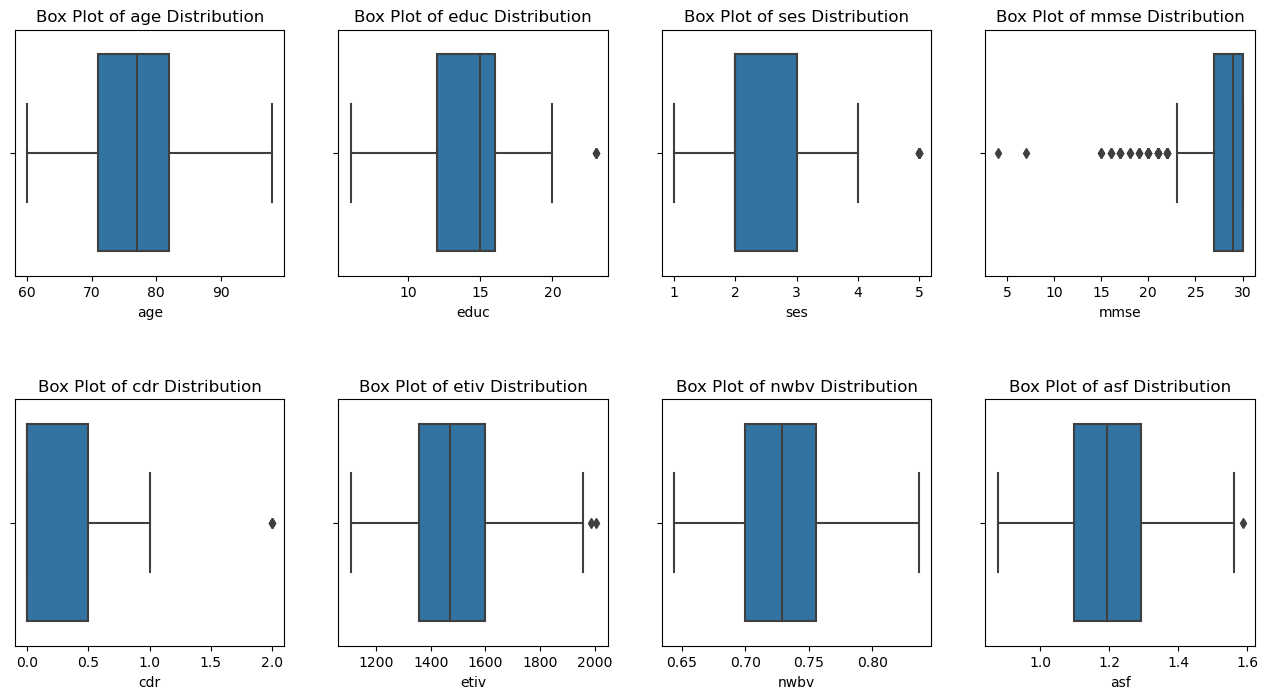

In [10]:

numerical_attributes = ['age', 'educ', 'ses', 'mmse', 'cdr', 'etiv', 'nwbv', 'asf']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
fig.subplots_adjust(hspace=0.5)

# Create box plots for each numerical attribute
for i, attribute in enumerate(numerical_attributes):
    row, col = i // 4, i % 4
    sns.boxplot(x=attribute, data=data, ax=axes[row, col])
    axes[row, col].set_xlabel(attribute)
    axes[row, col].set_title(f'Box Plot of {attribute} Distribution')

# Remove any remaining empty subplots
for i in range(len(numerical_attributes), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

plt.show()


In [11]:
data = data.drop(columns=['Subject_ID', 'MRI_ID'])

###  Imputation Using KNN

In [12]:


# Manually encode the 'sex', 'group', and 'hand' columns
data['sex'] = data['sex'].map({'F': 0, 'M': 1})
data['group'] = data['group'].map({'Nondemented': 0, 'Demented': 1})
data['hand'] = data['hand'].map({'L': 0, 'R': 1})

# Initialize the KNN Imputer with nan_euclidean metric
imputer = KNNImputer(n_neighbors=5, metric='nan_euclidean')
imputed_data = imputer.fit_transform(data)
imputed_data_df = pd.DataFrame(imputed_data, columns=data.columns)
print(imputed_data_df.head())

   group  visit  mr_delay  sex  hand   age  educ  ses  mmse  cdr    etiv  \
0    0.0    1.0       0.0  1.0   1.0  87.0  14.0  2.0  27.0  0.0  1987.0   
1    0.0    2.0     457.0  1.0   1.0  88.0  14.0  2.0  30.0  0.0  2004.0   
2    1.0    1.0       0.0  1.0   1.0  75.0  12.0  1.8  23.0  0.5  1678.0   
3    1.0    2.0     560.0  1.0   1.0  76.0  12.0  1.6  28.0  0.5  1738.0   
4    1.0    3.0    1895.0  1.0   1.0  80.0  12.0  2.6  22.0  0.5  1698.0   

    nwbv    asf  
0  0.696  0.883  
1  0.681  0.876  
2  0.736  1.046  
3  0.713  1.010  
4  0.701  1.034  


In [13]:
imputed_data_df['group'] = imputed_data_df['group'].astype(int)

In [14]:

data.isnull().sum()

group       37
visit        0
mr_delay     0
sex          0
hand         0
age          0
educ         0
ses         19
mmse         2
cdr          0
etiv         0
nwbv         0
asf          0
dtype: int64

In [15]:
imputed_data_df.isnull().sum()

group       0
visit       0
mr_delay    0
sex         0
hand        0
age         0
educ        0
ses         0
mmse        0
cdr         0
etiv        0
nwbv        0
asf         0
dtype: int64

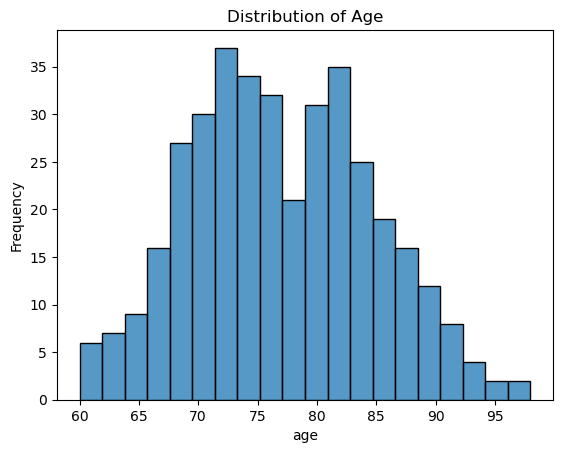

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram of the Age feature
sns.histplot(imputed_data_df['age'], bins=20)
plt.xlabel('age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()


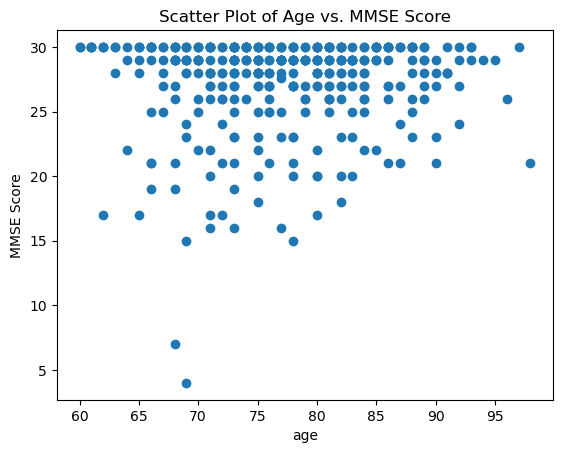

In [17]:
import matplotlib.pyplot as plt

# Create a scatter plot to visualize the relationship between Age and MMSE
plt.scatter(imputed_data_df['age'], imputed_data_df['mmse'])
plt.xlabel('age')
plt.ylabel('MMSE Score')
plt.title('Scatter Plot of Age vs. MMSE Score')
plt.show()

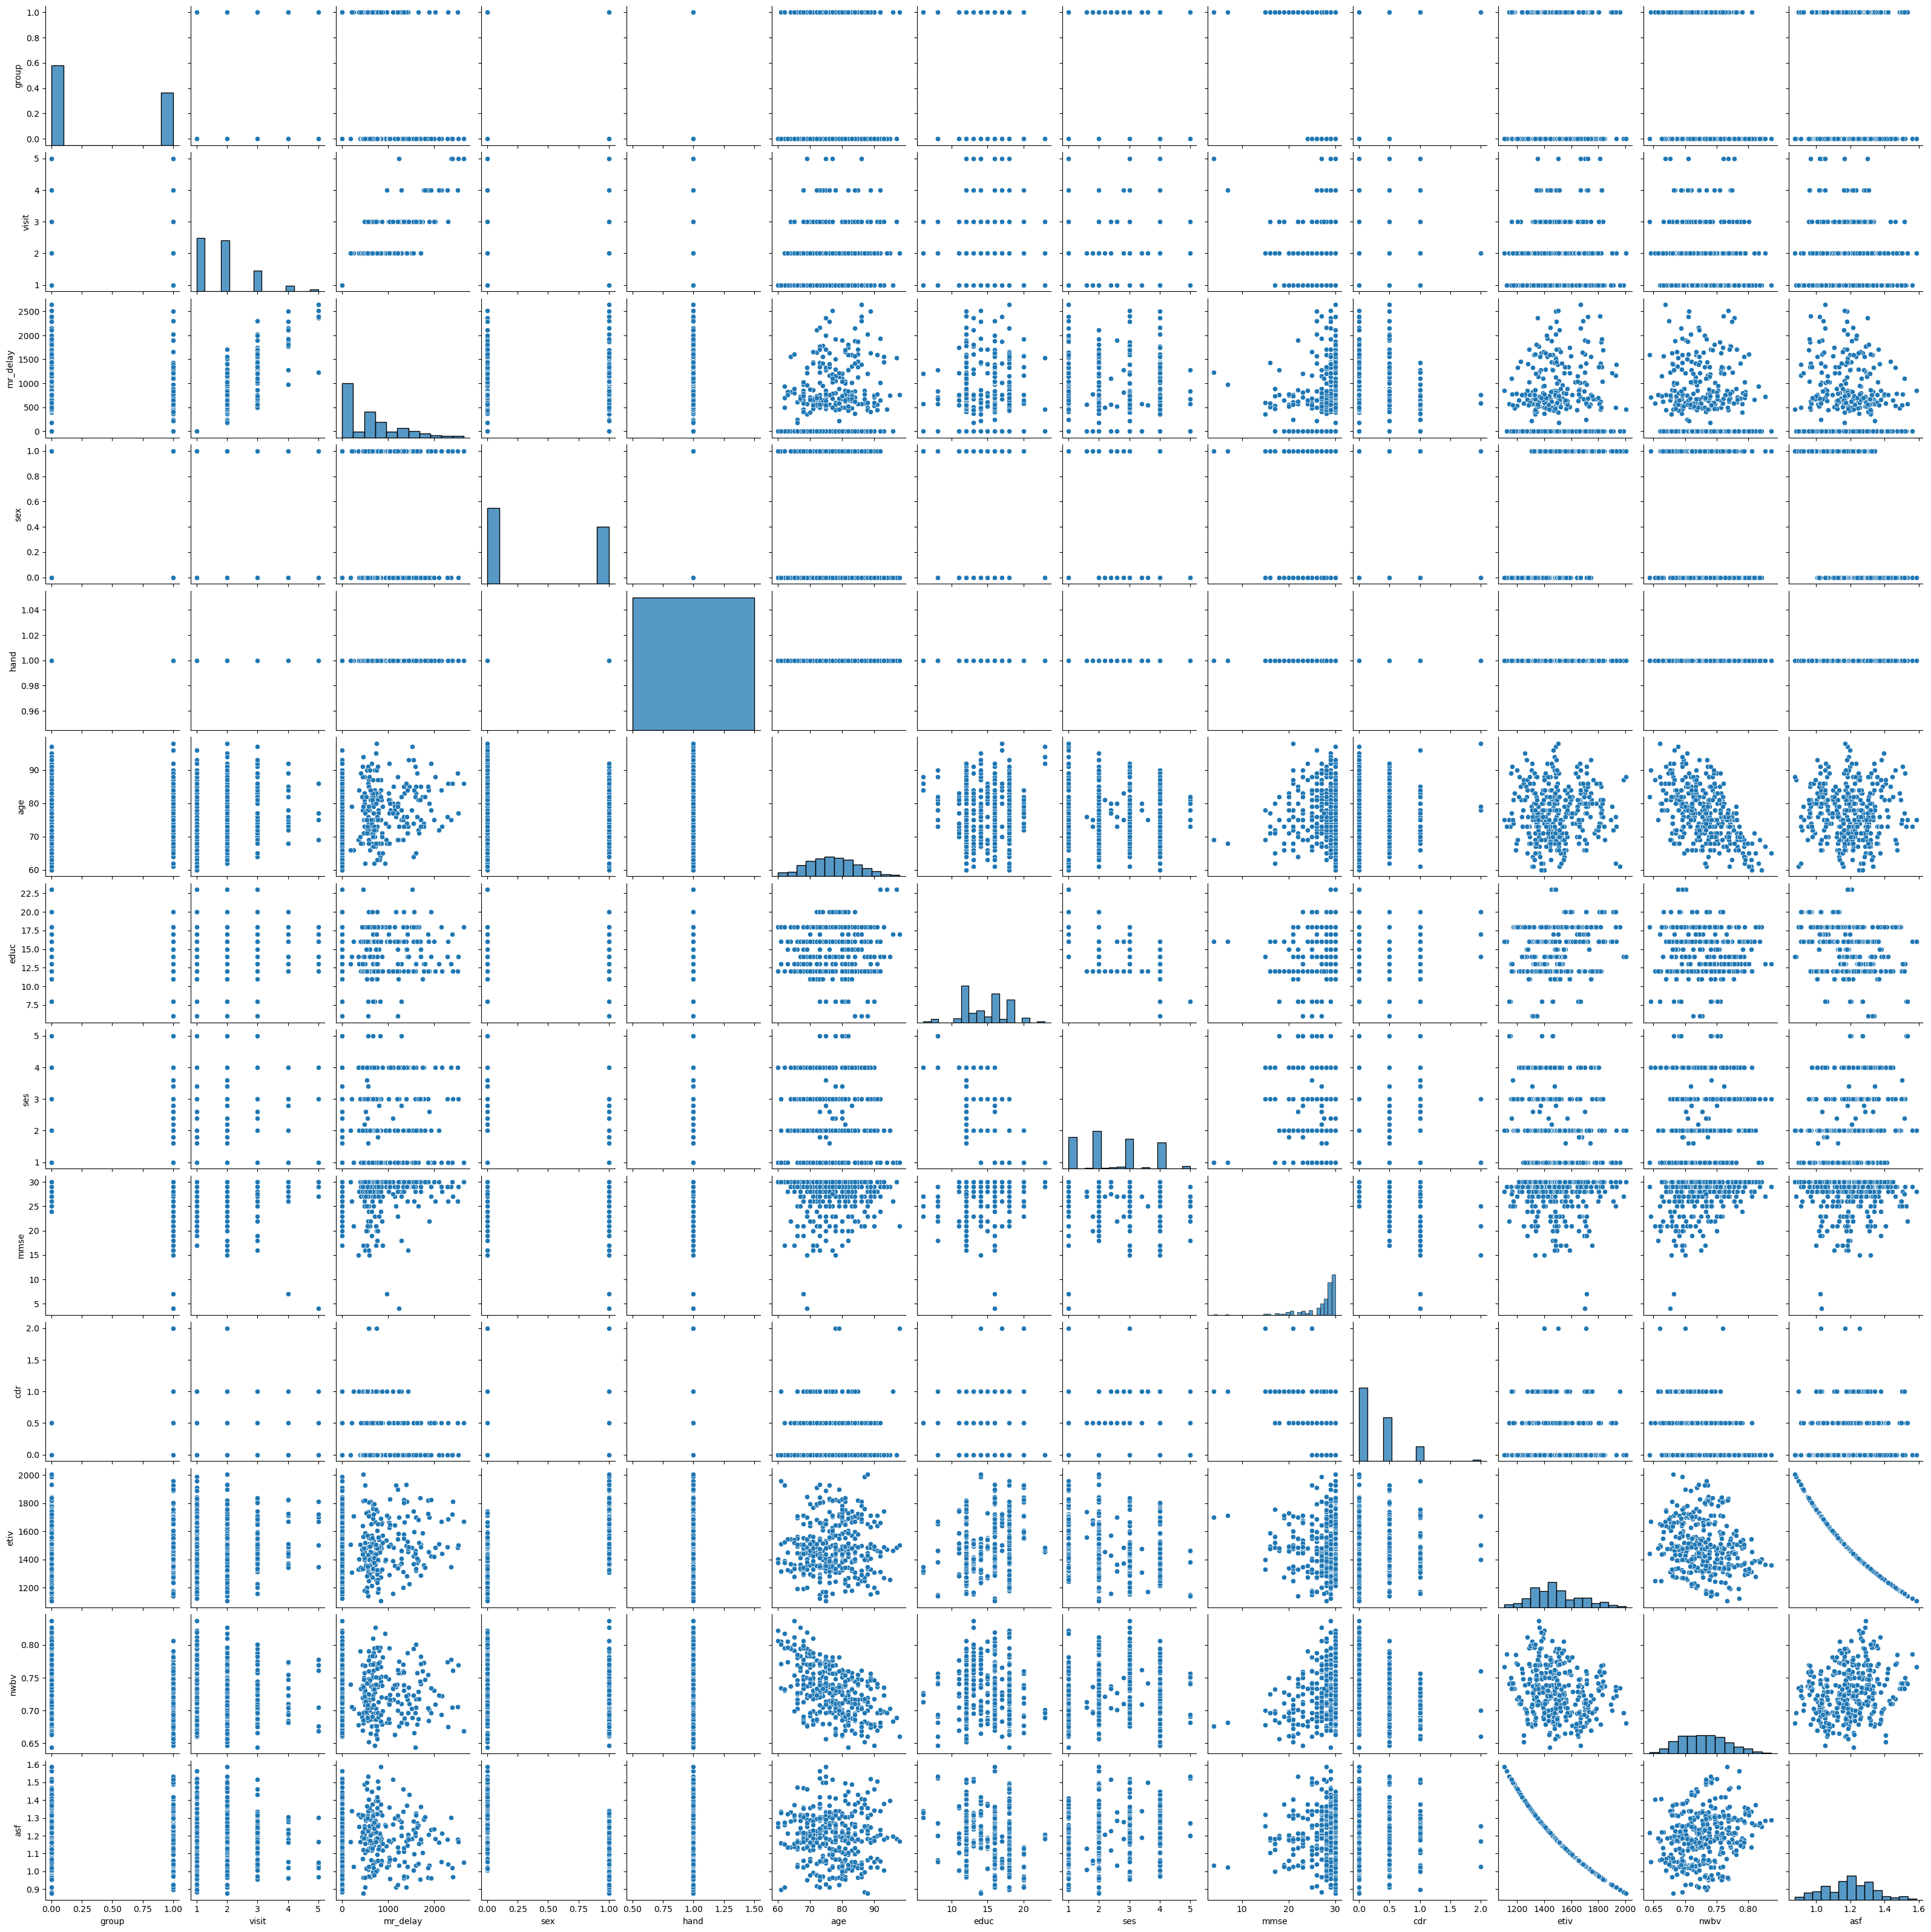

In [18]:
sns.pairplot(imputed_data_df)


             group     visit  mr_delay       sex  hand       age      educ  \
group     1.000000 -0.139981 -0.190006  0.260362   NaN -0.066776 -0.256559   
visit    -0.139981  1.000000  0.920009  0.069791   NaN  0.183213  0.024615   
mr_delay -0.190006  0.920009  1.000000  0.048006   NaN  0.205357  0.051630   
sex       0.260362  0.069791  0.048006  1.000000   NaN -0.037726  0.089279   
hand           NaN       NaN       NaN       NaN   NaN       NaN       NaN   
age      -0.066776  0.183213  0.205357 -0.037726   NaN  1.000000 -0.027886   
educ     -0.256559  0.024615  0.051630  0.089279   NaN -0.027886  1.000000   
ses       0.188527 -0.047155 -0.028713 -0.059087   NaN -0.045242 -0.702302   
mmse     -0.602033 -0.028995  0.066052 -0.165110   NaN  0.056027  0.195724   
cdr       0.805013  0.002325 -0.062915  0.202140   NaN -0.026257 -0.153121   
etiv     -0.015547  0.117428  0.119624  0.572549   NaN  0.042348  0.257015   
nwbv     -0.291266 -0.126682 -0.105586 -0.249618   NaN -0.518359

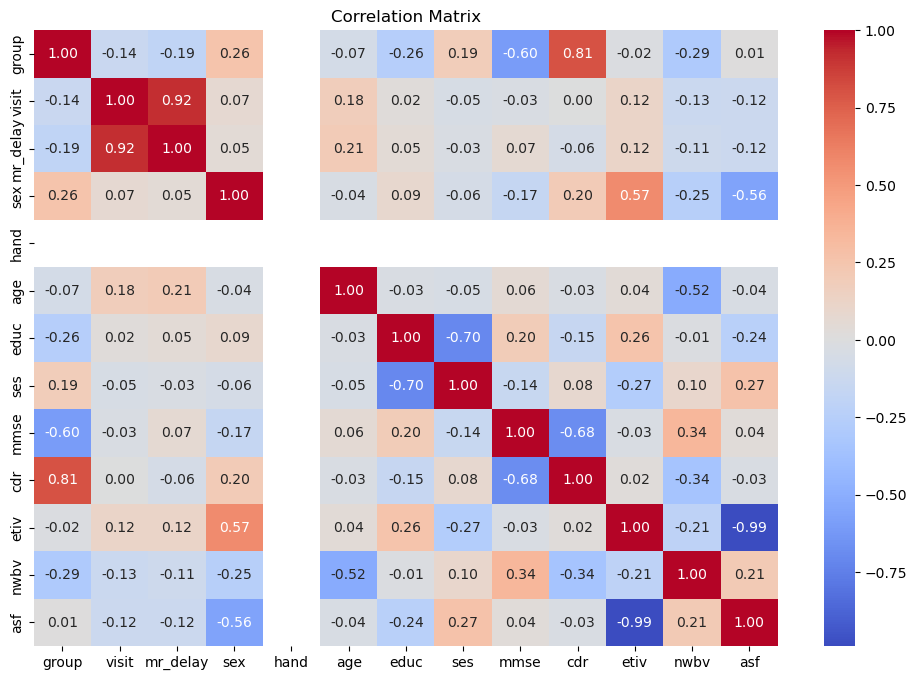

In [19]:
correlation_matrix = imputed_data_df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

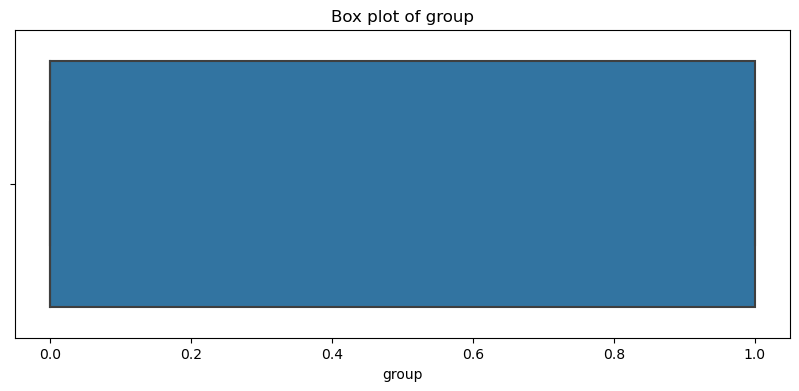

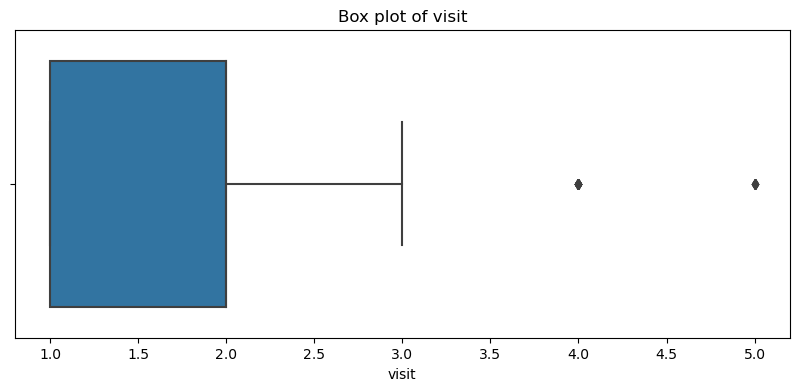

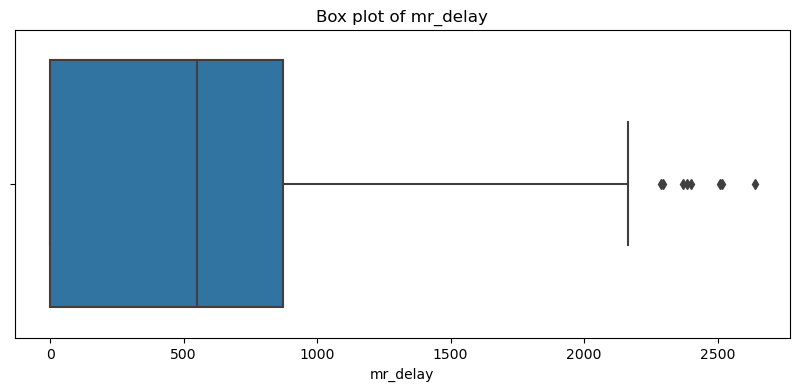

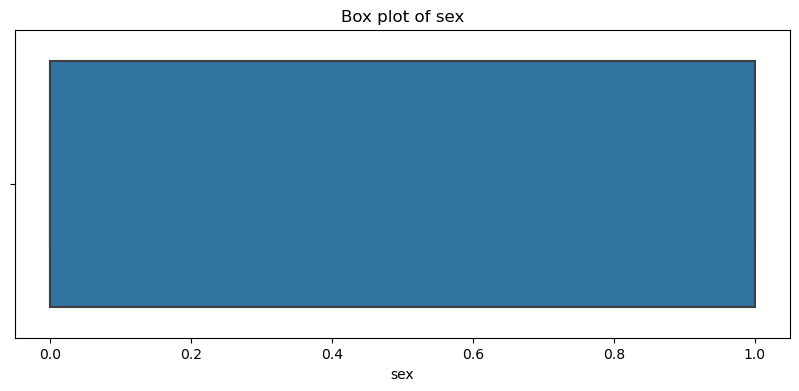

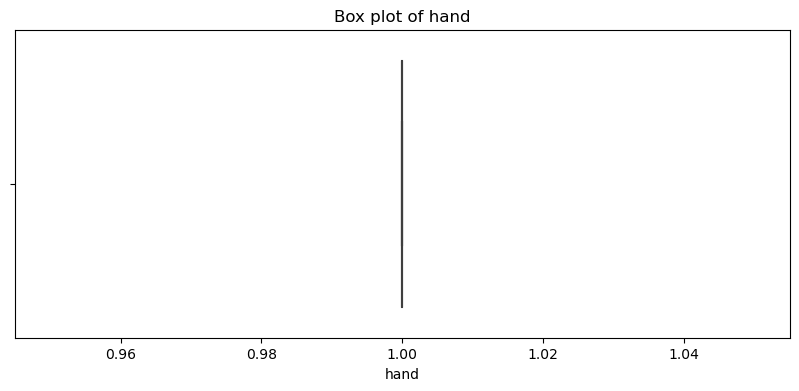

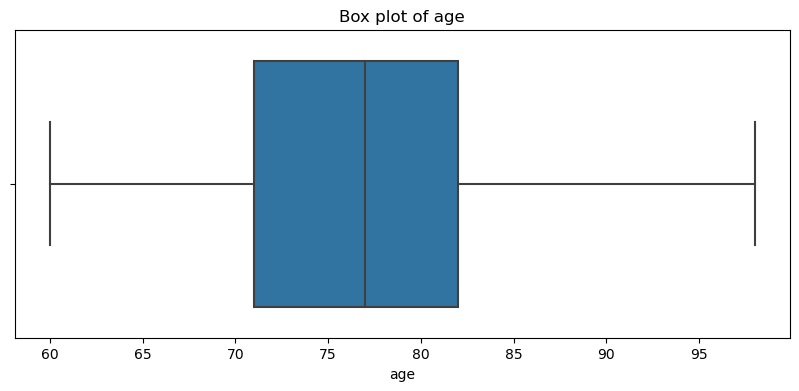

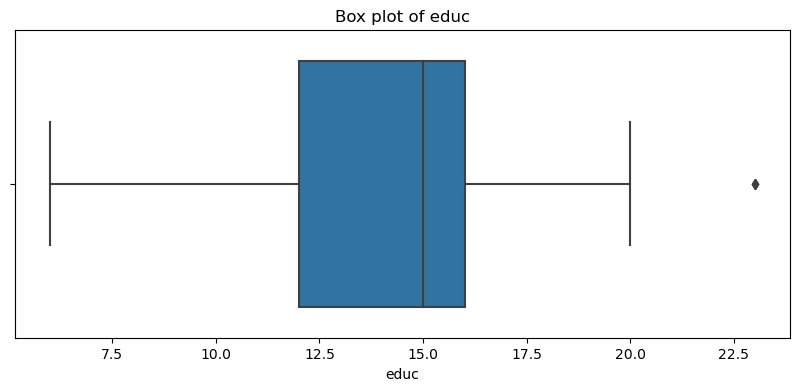

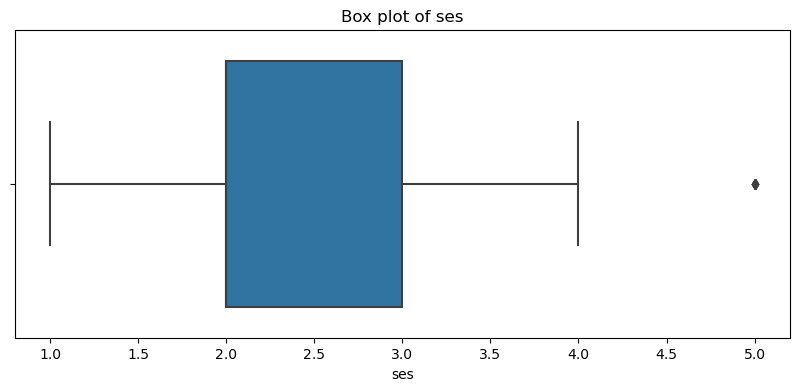

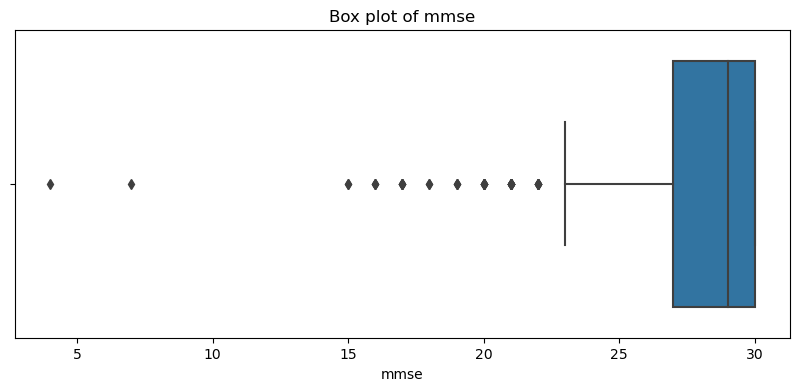

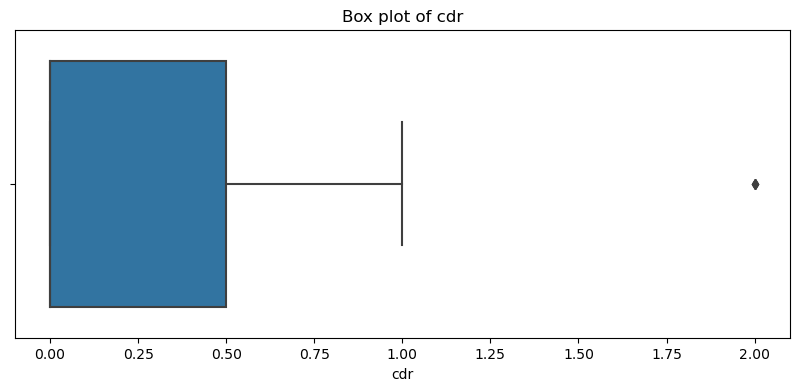

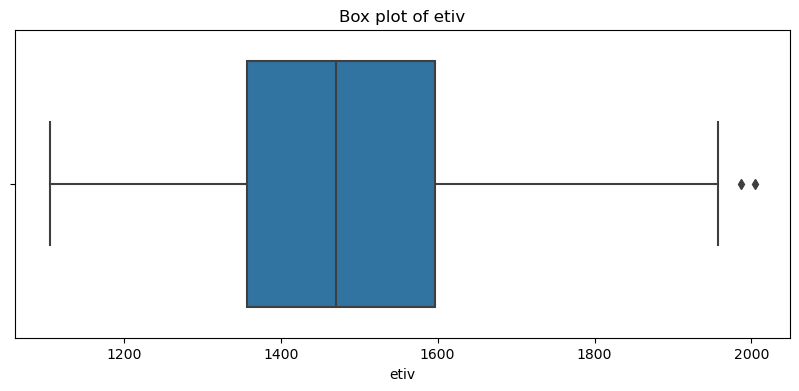

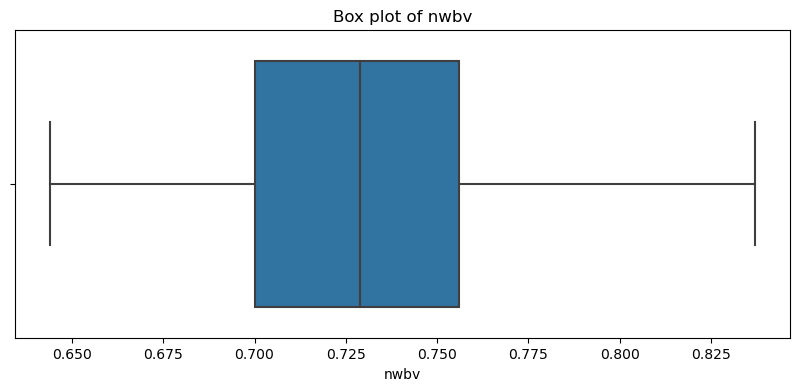

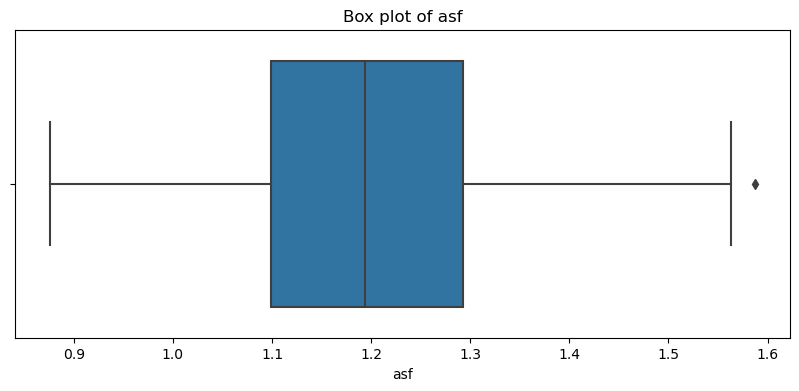

In [20]:
for column in imputed_data_df.columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=imputed_data_df[column])
    plt.title(f'Box plot of {column}')
    plt.show()

In [21]:
#capping for treating the outliers
for column in imputed_data_df.columns:
    upper_limit = imputed_data_df[column].quantile(0.95)
    lower_limit = imputed_data_df[column].quantile(0.05)
    imputed_data_df[column] = np.where(imputed_data_df[column] > upper_limit, upper_limit, imputed_data_df[column])
    imputed_data_df[column] = np.where(imputed_data_df[column] < lower_limit, lower_limit, imputed_data_df[column])

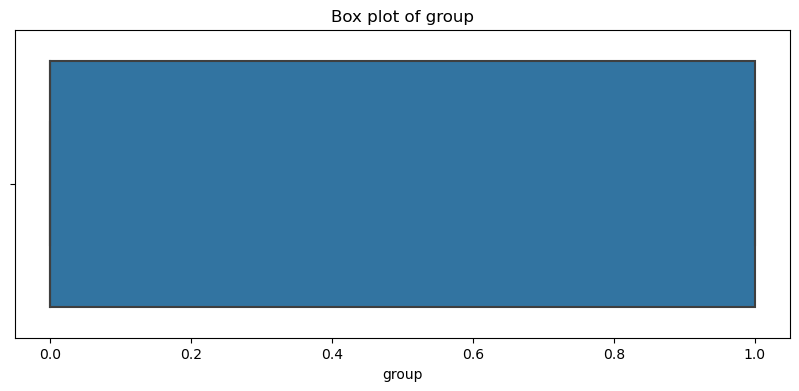

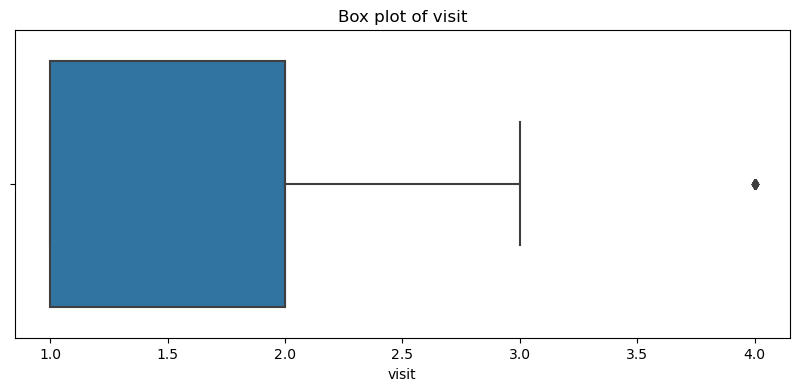

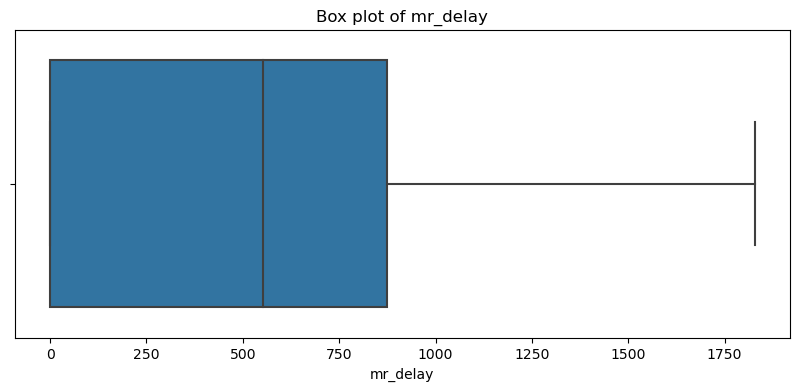

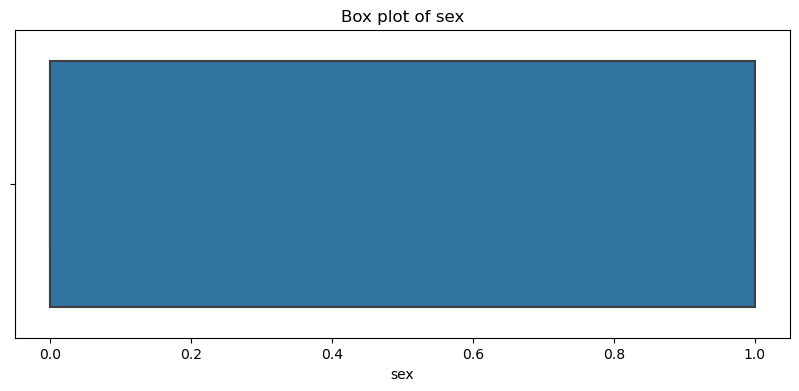

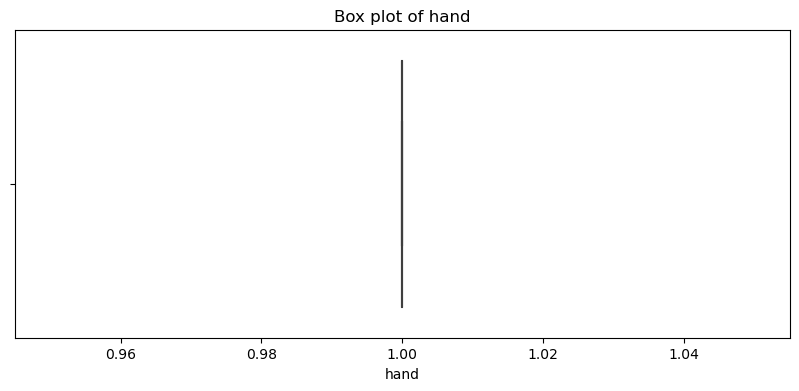

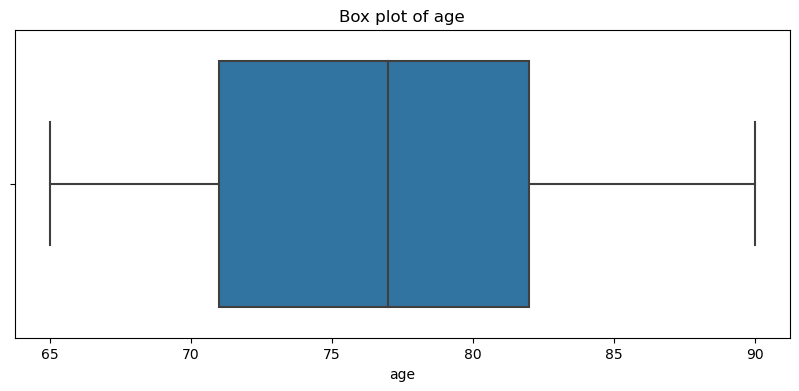

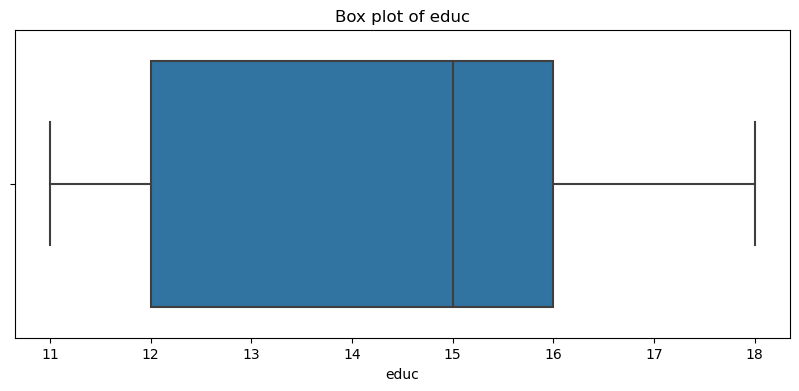

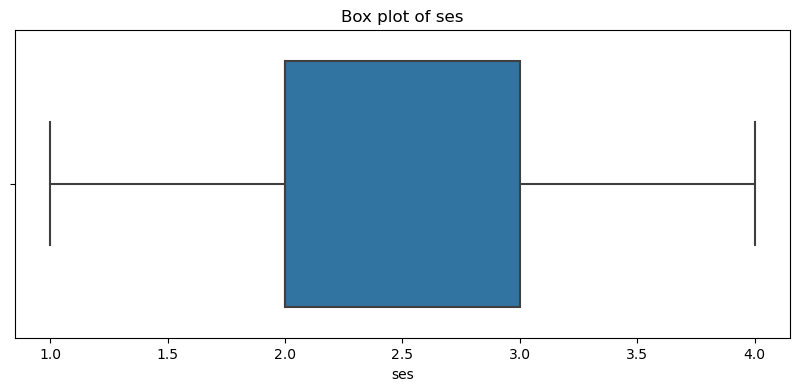

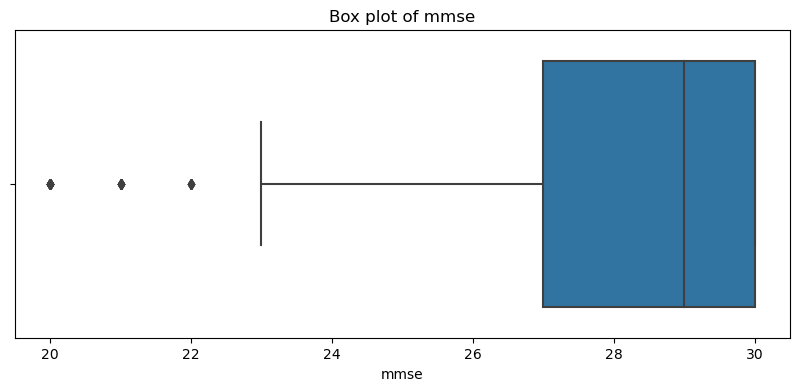

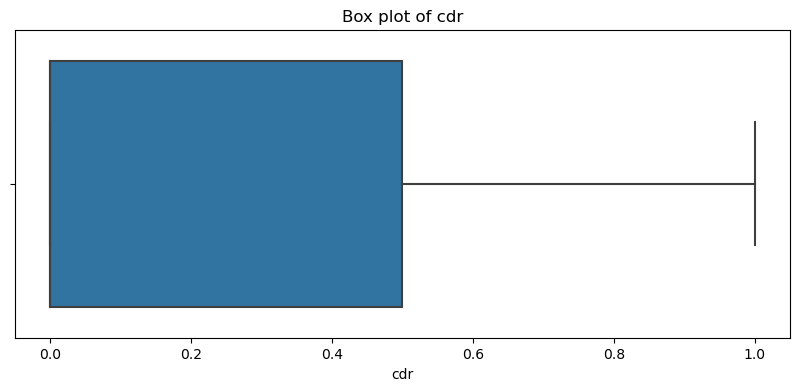

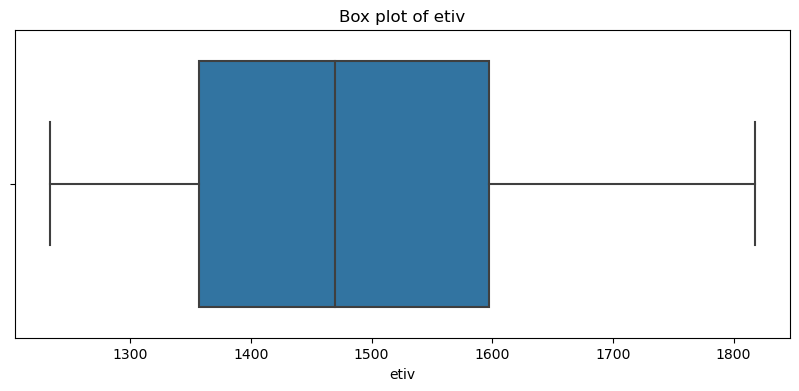

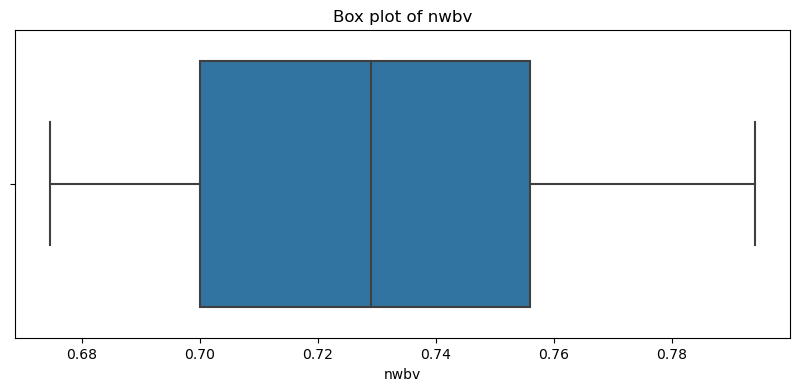

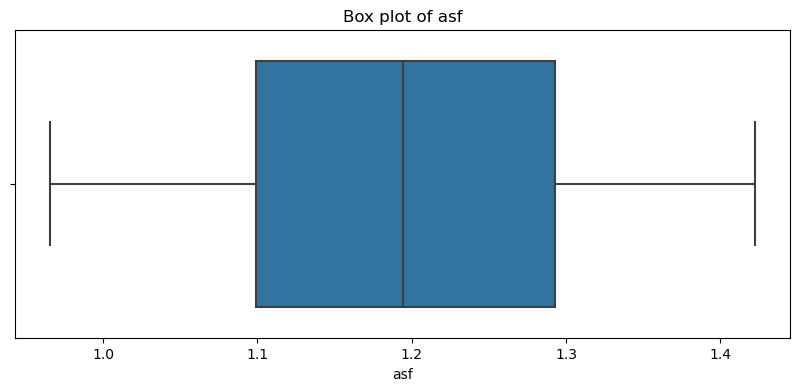

In [22]:
for column in imputed_data_df.columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=imputed_data_df[column])
    plt.title(f'Box plot of {column}')
    plt.show()

In [23]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


X = imputed_data_df.drop(columns=['group']) 
y = imputed_data_df['group']

# Select the top k features based on their F-statistic scores 
k = 8  
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)

selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = X.columns[selected_feature_indices]
print("Selected Features:")
print(selected_feature_names)

Selected Features:
Index(['visit', 'mr_delay', 'sex', 'educ', 'ses', 'mmse', 'cdr', 'nwbv'], dtype='object')


C:\Users\Mythresh Neerugattu\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [3] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Mythresh Neerugattu\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [24]:
X = imputed_data_df[selected_feature_names]  # Use the selected features
y = imputed_data_df['group']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
y_train

192    0.0
75     1.0
84     0.0
361    0.0
16     1.0
      ... 
71     0.0
106    1.0
270    0.0
348    0.0
102    0.0
Name: group, Length: 298, dtype: float64

In [26]:
imputed_data_df.isnull().sum()

group       0
visit       0
mr_delay    0
sex         0
hand        0
age         0
educ        0
ses         0
mmse        0
cdr         0
etiv        0
nwbv        0
asf         0
dtype: int64

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier()

cv_scores = cross_val_score(clf, X, y, cv=5)

print("CV Scores for each fold:", cv_scores)

print("Mean CV Score:", cv_scores.mean())
print("Standard Deviation in CV Scores:", cv_scores.std())


CV Scores for each fold: [0.93333333 0.98666667 0.97333333 0.91891892 0.91891892]
Mean CV Score: 0.9462342342342343
Standard Deviation in CV Scores: 0.02838249076452266


### Logistic Regression

In [28]:

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,y_train)

y_pred_lr = lr.predict(X_test)

C:\Users\Mythresh Neerugattu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {accuracy_lr:.2f}")

# Calculate precision
precision_lr = precision_score(y_test, y_pred_lr)
print(f"Precision: {precision_lr:.2f}")

# Calculate recall
recall_lr = recall_score(y_test, y_pred_lr)
print(f"Recall: {recall_lr:.2f}")

# Calculate F1-score
f1_lr = f1_score(y_test, y_pred_lr)
print(f"F1-score: {f1_lr:.2f}")

# Calculate confusion matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:")
print(conf_matrix_lr)


Accuracy: 0.96
Precision: 0.97
Recall: 0.94
F1-score: 0.95
Confusion Matrix:
[[41  1]
 [ 2 31]]


### K-Nearest neighbors

In [30]:

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)

C:\Users\Mythresh Neerugattu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [31]:

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy_knn:.2f}")

# Calculate precision
precision_knn = precision_score(y_test, y_pred_knn)
print(f"Precision: {precision_knn:.2f}")

# Calculate recall
recall_knn = recall_score(y_test, y_pred_knn)
print(f"Recall: {recall_knn:.2f}")

# Calculate F1-score
f1_knn = f1_score(y_test, y_pred_knn)
print(f"F1-score: {f1_knn:.2f}")

# Calculate confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:")
print(conf_matrix_knn)


Accuracy: 0.73
Precision: 0.78
Recall: 0.55
F1-score: 0.64
Confusion Matrix:
[[37  5]
 [15 18]]


### SVM

In [32]:

from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, y_train)

y_pred_svm = sv.predict(X_test)

In [33]:

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy_svm:.2f}")

# Calculate precision
precision_svm = precision_score(y_test, y_pred_svm)
print(f"Precision: {precision_svm:.2f}")

# Calculate recall
recall_svm = recall_score(y_test, y_pred_svm)
print(f"Recall: {recall_svm:.2f}")

# Calculate F1-score
f1_svm = f1_score(y_test, y_pred_svm)
print(f"F1-score: {f1_svm:.2f}")

# Calculate confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:")
print(conf_matrix_svm)


Accuracy: 0.95
Precision: 0.94
Recall: 0.94
F1-score: 0.94
Confusion Matrix:
[[40  2]
 [ 2 31]]


###  Kernalized_SVM

In [34]:
sv_kernal = svm.SVC(kernel='poly')

# Train the model using the training sets
sv_kernal.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred_svmk = sv_kernal.predict(X_test)

In [35]:

# Calculate accuracy
accuracy_svmk = accuracy_score(y_test, y_pred_svmk)
print(f"Accuracy: {accuracy_svmk:.2f}")

# Calculate precision
precision_svmk = precision_score(y_test, y_pred_svmk)
print(f"Precision: {precision_svmk:.2f}")

# Calculate recall
recall_svmk = recall_score(y_test, y_pred_svmk)
print(f"Recall: {recall_svmk:.2f}")

# Calculate F1-score
f1_svmk = f1_score(y_test, y_pred_svmk)
print(f"F1-score: {f1_svmk:.2f}")

# Calculate confusion matrix
conf_matrix_svmk = confusion_matrix(y_test, y_pred_svmk)
print("Confusion Matrix:")
print(conf_matrix_svmk)


Accuracy: 0.56
Precision: 0.00
Recall: 0.00
F1-score: 0.00
Confusion Matrix:
[[42  0]
 [33  0]]


C:\Users\Mythresh Neerugattu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###  Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to your training data
rf_classifier.fit(X_train, y_train)

# Predict using the trained Random Forest classifier
y_pred_rf = rf_classifier.predict(X_test)


In [37]:

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.2f}")

# Calculate precision
precision_rf = precision_score(y_test, y_pred_rf)
print(f"Precision: {precision_rf:.2f}")

# Calculate recall
recall_rf = recall_score(y_test, y_pred_rf)
print(f"Recall: {recall_rf:.2f}")

# Calculate F1-score
f1_rf = f1_score(y_test, y_pred_rf)
print(f"F1-score: {f1_rf:.2f}")

# Calculate confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(conf_matrix_rf)


Accuracy: 0.92
Precision: 0.94
Recall: 0.88
F1-score: 0.91
Confusion Matrix:
[[40  2]
 [ 4 29]]


###  Comparing the Accuracy 

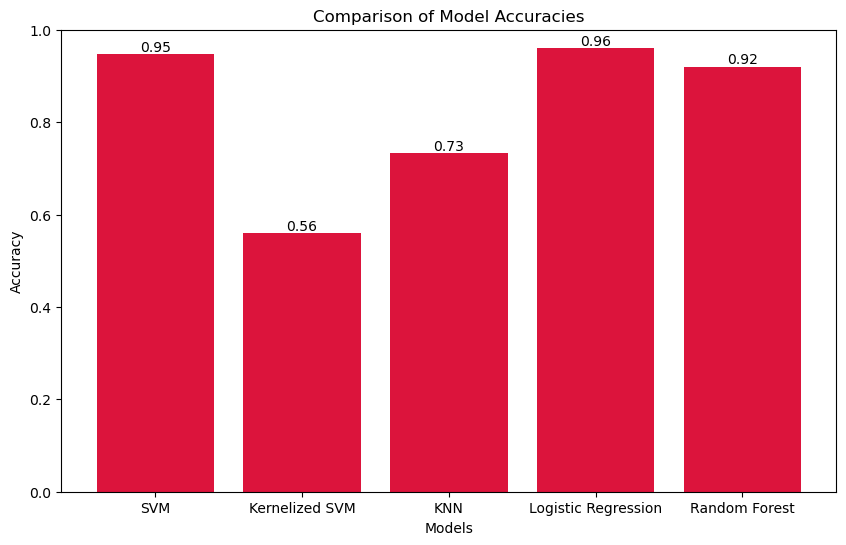

In [38]:
import matplotlib.pyplot as plt

# Accuracy scores for each model
accuracy_scores = {
    'SVM': accuracy_svm,
    'Kernelized SVM': accuracy_svmk,
    'KNN': accuracy_knn,
    'Logistic Regression': accuracy_lr,
    'Random Forest': accuracy_rf
}

# Model names
models = list(accuracy_scores.keys())

# Corresponding accuracies
accuracies = list(accuracy_scores.values())

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='Crimson')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim([0, 1]) # Assuming accuracy is a fraction, this sets the y-axis limits to 0-1

for i in range(len(models)):
    plt.text(i, accuracies[i], f'{accuracies[i]:.2f}', ha = 'center', va = 'bottom')

plt.show()


###  Plotting the Confusion Matrix

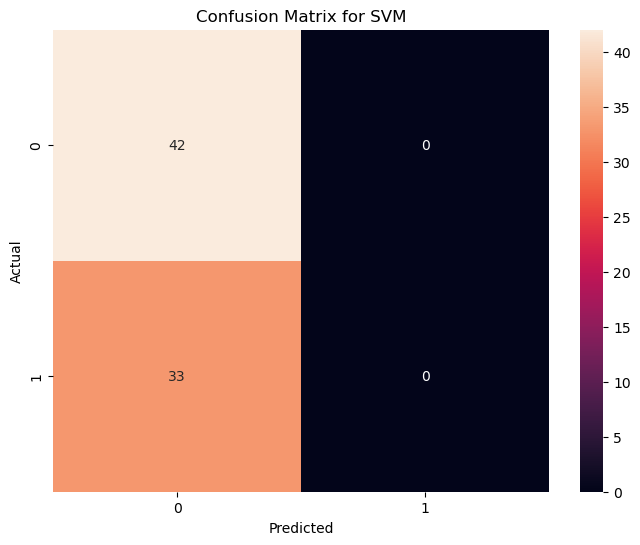

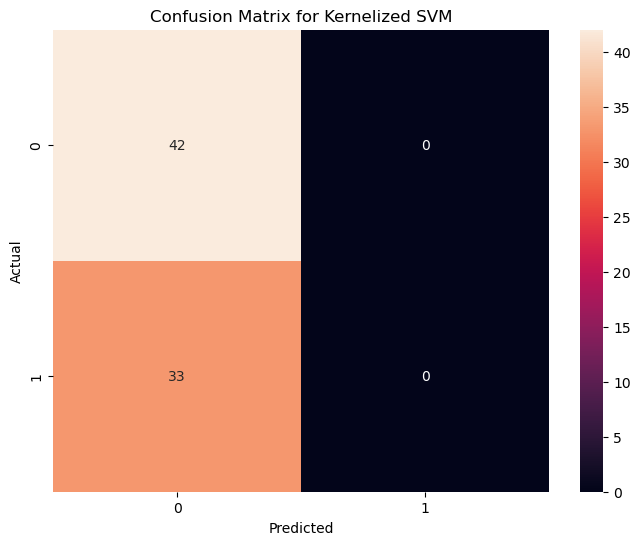

C:\Users\Mythresh Neerugattu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


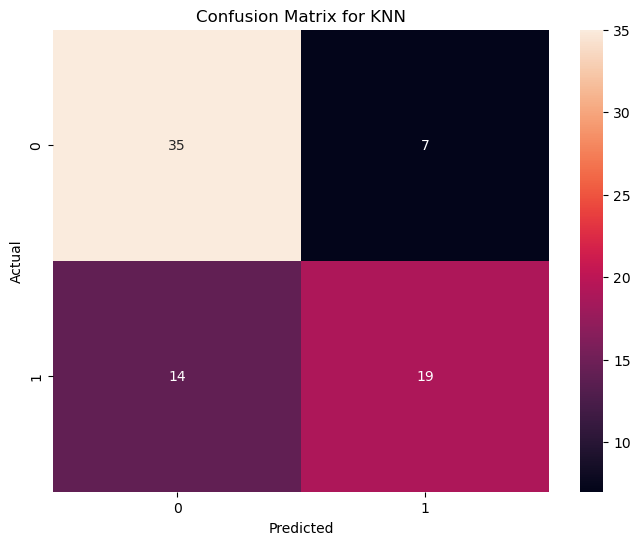

C:\Users\Mythresh Neerugattu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


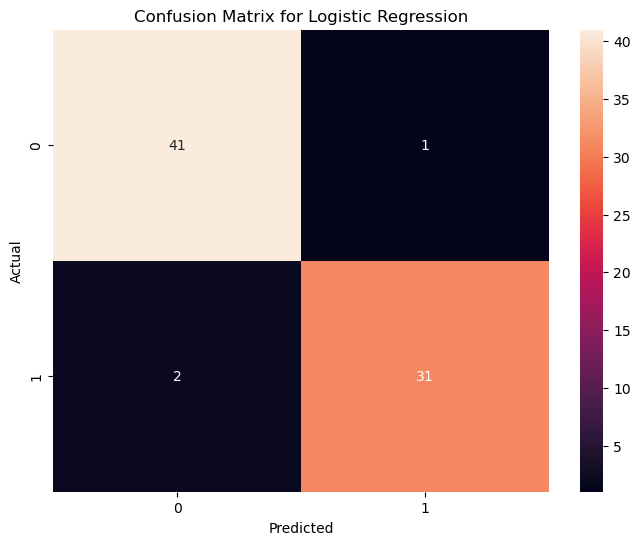

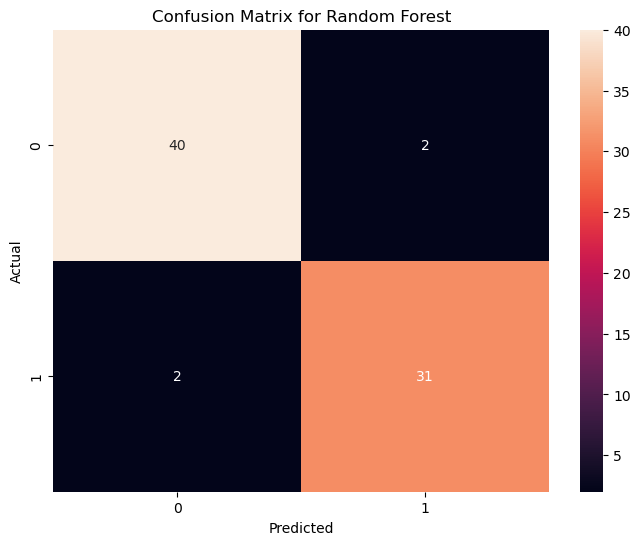

In [39]:
models= {
     'SVM': svm.SVC(),
    'Kernelized SVM': svm.SVC(kernel='poly'),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier()
}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g')
    plt.title(f'Confusion Matrix for {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

###  Overall, the 96% mark achieved by Logistic Regression is indicative of a model that not only predicts accurately but also maintains a commendable equilibrium between the various facets of predictive performance. This makes it a particularly valuable tool in scenarios where both the reduction of false positives and the capture of true positives are equally critical.